In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import utils.plot_utils as plu
from tqdm import tqdm
import numpy as np
import pickle
from signal_processing import sr_processing as sr
from hu_classes.hu_dataloader import matrics_loader
import signal_processing.subsetter as sset
import numpy as np
from utils import plot_utils as plu
import utils.data_extraction as datrac
import pandas as pd
import utils.summarize as summer 

In [4]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
pbar = tqdm(total = len(os.listdir(dat_spike_paths)), leave = True)
for session_path in os.listdir(dat_spike_paths):
    session_path = os.path.join(dat_spike_paths,session_path)
    df_path =os.path.join(session_path,'data.pkl')
    df_analysis = pd.read_pickle(df_path)
    corr_map_path = os.path.join(session_path,'spon_coor_maps.pkl')
    corr_map = datrac.load_pickle(corr_map_path)
    cell_type = df_analysis.cell_type
    region_labels = df_analysis.region.values
    layer_labels = df_analysis.layer.values
    tar_reg = 'SSp'
    trt_reg2  = [i for i in np.unique(region_labels).tolist() if 'RS' in i][0]
    data_dic = {}
    for i in corr_map.keys():
        mat, info_y, info_x = sset.calculate_inter_regional_correlation(region_labels,
                                                                            layer_labels, 
                                                                            corr_map[i],
                                                                            tar_reg,trt_reg2)
        strengths = np.linalg.norm(mat,axis=1)
        labels = sset.expand_labels_by_neuron_count(info_y)
        layer_data_results = sset.group_data_by_hardcoded_layers_compatible(labels,strengths)
        data_dic[i] = layer_data_results
    save_filename = f"SSp_RSpd_spon.pkl"
    save_path = os.path.join(session_path, save_filename)
    with open(save_path, 'wb') as f:
        pickle.dump(data_dic, f)
    pbar.update(1)

100%|██████████| 11/11 [00:03<00:00,  4.52it/s]

In [5]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
pbar = tqdm(total = len(os.listdir(dat_spike_paths)), leave = True)
for session_path in os.listdir(dat_spike_paths):
    session_path = os.path.join(dat_spike_paths,session_path)
    df_path =os.path.join(session_path,'data.pkl')
    df_analysis = pd.read_pickle(df_path)
    corr_map_path = os.path.join(session_path,'spon_coor_maps.pkl')
    corr_map = datrac.load_pickle(corr_map_path)
    cell_type = df_analysis.cell_type
    region_labels = df_analysis.region.values
    layer_labels = df_analysis.layer.values
    tar_reg = [i for i in np.unique(region_labels).tolist() if 'VIS' in i][0]
    trt_reg2  = [i for i in np.unique(region_labels).tolist() if 'RS' in i][0]
    data_dic = {}
    for i in corr_map.keys():
        mat, info_y, info_x = sset.calculate_inter_regional_correlation(region_labels,
                                                                            layer_labels, 
                                                                            corr_map[i],
                                                                            tar_reg,trt_reg2)
        strengths = np.linalg.norm(mat,axis=1)
        labels = sset.expand_labels_by_neuron_count(info_y)
        layer_data_results = sset.group_data_by_hardcoded_layers_compatible(labels,strengths)
        data_dic[i] = layer_data_results
    save_filename = f"VISp_RSpd_spon.pkl"
    save_path = os.path.join(session_path, save_filename)
    with open(save_path, 'wb') as f:
        pickle.dump(data_dic, f)
    pbar.update(1)

100%|██████████| 11/11 [00:28<00:00,  2.56s/it]


In [6]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
post, pre = sset.find_directories_with_rfmapping(dat_spike_paths)
save_path = '/home/tony/Halluci-Nations/results'

In [7]:
pre_dfs = []
for session in pre:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'SSp_RSpd_spon.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe2(data)
    df_temp['session'] = 'sal'
    df_temp['subject'] = subject_id
    pre_dfs.append(df_temp)
post_dfs = []
for session in post:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'SSp_RSpd_spon.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe2(data)
    df_temp['session'] = 'psy'
    df_temp['subject'] = subject_id
    post_dfs.append(df_temp)
all_dfs = pre_dfs + post_dfs
final_df_ssp = pd.concat(all_dfs)
final_df_ssp.to_csv(f'{save_path}/SSp_RSpd__connectivity_spon.csv')

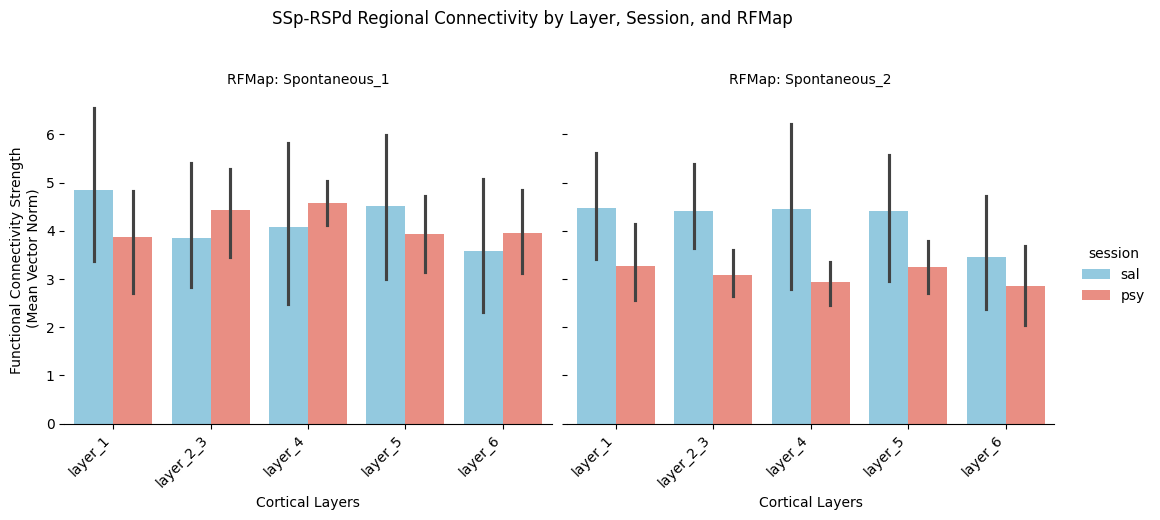

In [9]:
g = sns.catplot(
    data=final_df_ssp,
    x='layers',
    y='median',
    hue='session',
    col='RFmaps',
    kind='bar',
    palette={'sal': 'skyblue', 'psy': 'salmon'},
    legend_out=True
)

# 3. Customize the plot for better readability
g.fig.suptitle('SSp-RSPd Regional Connectivity by Layer, Session, and RFMap', y=1.03)
g.set_axis_labels("Cortical Layers", "Functional Connectivity Strength \n(Mean Vector Norm)")
g.set_titles("RFMap: {col_name}")
g.despine(left=True)

# Rotate x-axis labels to prevent overlap
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Move the legend to the right of the plot
sns.move_legend(g, "center left", bbox_to_anchor=(1, 0.5))

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.savefig(f'{save_path}/ssp_rspd_connectivity_spon_median.svg')


In [10]:
pre_dfs = []
for session in pre:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'VISp_RSpd_spon.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe2(data)
    df_temp['session'] = 'sal'
    df_temp['subject'] = subject_id
    pre_dfs.append(df_temp)
post_dfs = []
for session in post:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'VISp_RSpd_spon.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe2(data)
    df_temp['session'] = 'psy'
    df_temp['subject'] = subject_id
    post_dfs.append(df_temp)
all_dfs = pre_dfs + post_dfs
final_df_visp = pd.concat(all_dfs)
final_df_visp.to_csv(f'{save_path}/VISp_RSpd__connectivity_spon.csv')

# Don't edit

In [2]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
pbar = tqdm(total = len(os.listdir(dat_spike_paths)), leave = True)
for session_path in os.listdir(dat_spike_paths):
    session_path = os.path.join(dat_spike_paths,session_path)
    df_path =os.path.join(session_path,'data.pkl')
    df_analysis = pd.read_pickle(df_path)
    corr_map_path = os.path.join(session_path,'spon_coor_maps.pkl')
    corr_map = datrac.load_pickle(corr_map_path)
    cell_type = df_analysis.cell_type
    regions = df_analysis.region
    layers = df_analysis.layer
    tar_reg = 'SSp'
    data_dic = {}
    for i in corr_map.keys():
        SSp_matrix, SSp_layer_labels, layer_info = sset.subset_and_organize_matrices(regions, layers, corr_map[i], tar_reg)
        strengths = np.linalg.norm(SSp_matrix,axis=1)
        layer_data_results = sset.group_data_by_hardcoded_layers_compatible(SSp_layer_labels,strengths)
        data_dic[i] = layer_data_results
    save_filename = f"SSp_interconnectivity_spon.pkl"
    save_path = os.path.join(session_path, save_filename)
    with open(save_path, 'wb') as f:
        pickle.dump(data_dic, f)
    pbar.update(1)

100%|██████████| 11/11 [00:04<00:00,  4.13it/s]

In [3]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
pbar = tqdm(total = len(os.listdir(dat_spike_paths)), leave = True)
for session_path in os.listdir(dat_spike_paths):
    session_path = os.path.join(dat_spike_paths,session_path)
    df_path =os.path.join(session_path,'data.pkl')
    df_analysis = pd.read_pickle(df_path)
    corr_map_path = os.path.join(session_path,'spon_coor_maps.pkl')
    corr_map = datrac.load_pickle(corr_map_path)
    cell_type = df_analysis.cell_type
    regions = df_analysis.region
    layers = df_analysis.layer
    tar_reg = [i for i in np.unique(regions).tolist() if 'VIS' in i][0]
    data_dic = {}
    for i in corr_map.keys():
        SSp_matrix, SSp_layer_labels, layer_info = sset.subset_and_organize_matrices(regions, layers, corr_map[i], tar_reg)
        strengths = np.linalg.norm(SSp_matrix,axis=1)
        layer_data_results = sset.group_data_by_hardcoded_layers_compatible(SSp_layer_labels,strengths)
        data_dic[i] = layer_data_results
    save_filename = f"Visp_interconnectivity_spon.pkl"
    save_path = os.path.join(session_path, save_filename)
    with open(save_path, 'wb') as f:
        pickle.dump(data_dic, f)
    pbar.update(1)

100%|██████████| 11/11 [00:04<00:00,  2.29it/s]


In [4]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
post, pre = sset.find_directories_with_rfmapping(dat_spike_paths)
save_path = '/home/tony/Halluci-Nations/results'

In [5]:
pre_dfs = []
for session in pre:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'SSp_interconnectivity_spon.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe2(data)
    df_temp['session'] = 'sal'
    df_temp['subject'] = subject_id
    pre_dfs.append(df_temp)
post_dfs = []
for session in post:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'SSp_interconnectivity_spon.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe2(data)
    df_temp['session'] = 'psy'
    df_temp['subject'] = subject_id
    post_dfs.append(df_temp)
all_dfs = pre_dfs + post_dfs
final_df_ssp = pd.concat(all_dfs)
final_df_ssp.to_csv(f'{save_path}/ssp_inter_connectivity_spon.csv')

/tmp/ipykernel_1021325/655934501.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


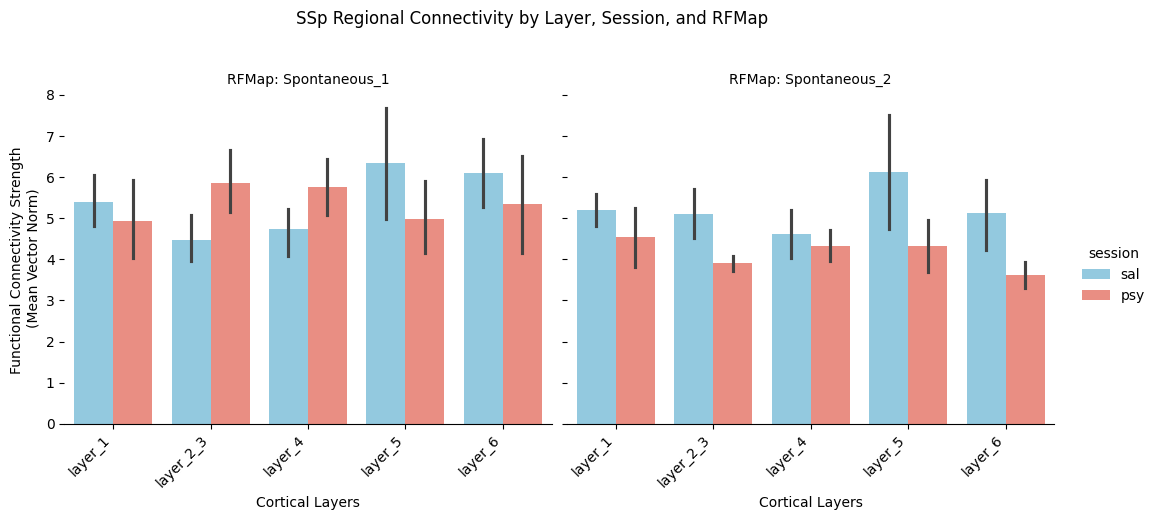

In [6]:
g = sns.catplot(
    data=final_df_ssp,
    x='layers',
    y='median',
    hue='session',
    col='RFmaps',
    kind='bar',
    palette={'sal': 'skyblue', 'psy': 'salmon'},
    ci=68,
    legend_out=True
)

# 3. Customize the plot for better readability
g.fig.suptitle('SSp Regional Connectivity by Layer, Session, and RFMap', y=1.03)
g.set_axis_labels("Cortical Layers", "Functional Connectivity Strength \n(Mean Vector Norm)")
g.set_titles("RFMap: {col_name}")
g.despine(left=True)

# Rotate x-axis labels to prevent overlap
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Move the legend to the right of the plot
sns.move_legend(g, "center left", bbox_to_anchor=(1, 0.5))

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.savefig(f'{save_path}/ssp_inter_connectivity_spon.svg')

/tmp/ipykernel_1021325/1861632630.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


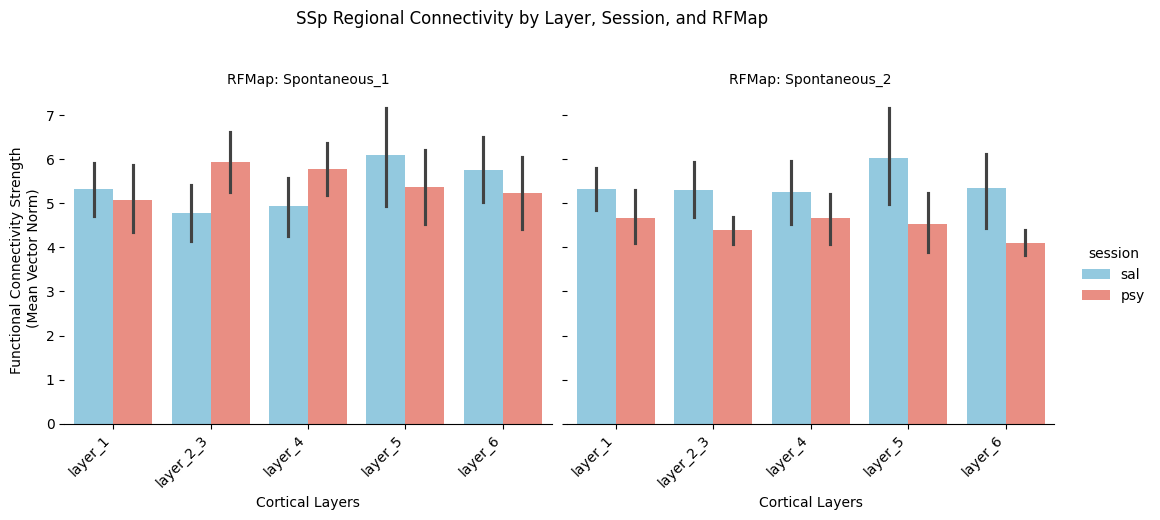

In [7]:
g = sns.catplot(
    data=final_df_ssp,
    x='layers',
    y='mean',
    hue='session',
    col='RFmaps',
    kind='bar',
    palette={'sal': 'skyblue', 'psy': 'salmon'},
    ci=68,
    legend_out=True
)

# 3. Customize the plot for better readability
g.fig.suptitle('SSp Regional Connectivity by Layer, Session, and RFMap', y=1.03)
g.set_axis_labels("Cortical Layers", "Functional Connectivity Strength \n(Mean Vector Norm)")
g.set_titles("RFMap: {col_name}")
g.despine(left=True)

# Rotate x-axis labels to prevent overlap
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Move the legend to the right of the plot
sns.move_legend(g, "center left", bbox_to_anchor=(1, 0.5))

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.savefig(f'{save_path}/ssp_inter_connectivity_spon_mean.svg')

In [8]:
pre_dfs = []
for session in pre:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'Visp_interconnectivity_spon.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe2(data)
    df_temp['session'] = 'sal'
    df_temp['subject'] = subject_id
    pre_dfs.append(df_temp)
post_dfs = []
for session in post:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'Visp_interconnectivity_spon.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe2(data)
    df_temp['session'] = 'psy'
    df_temp['subject'] = subject_id
    post_dfs.append(df_temp)
all_dfs = pre_dfs + post_dfs
final_df_visp = pd.concat(all_dfs)
final_df_visp.to_csv(f'{save_path}/Visp_inter_connectivity.csv')

/tmp/ipykernel_1074224/288731129.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


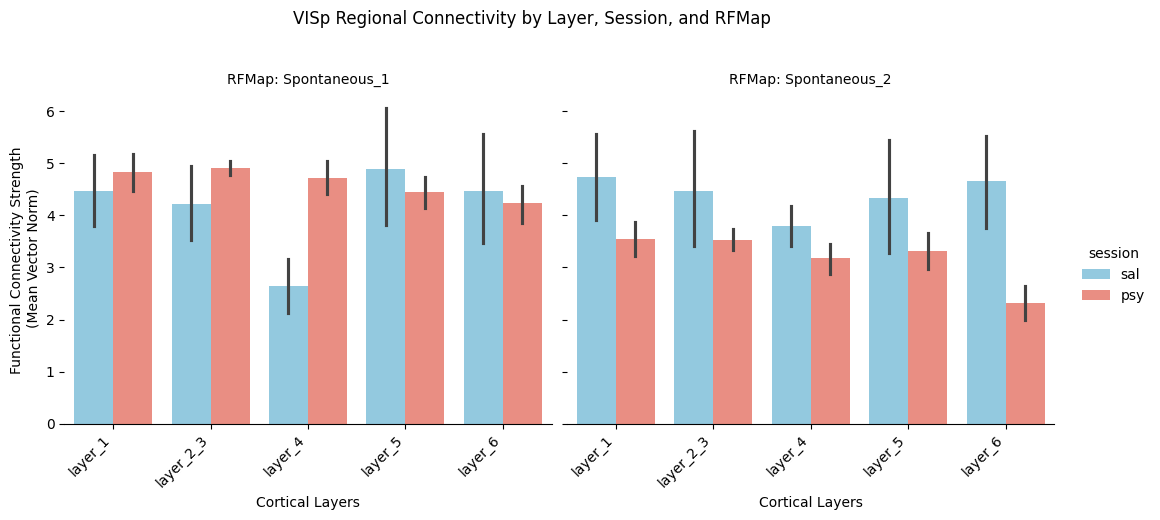

In [11]:
g = sns.catplot(
    data=final_df_visp,
    x='layers',
    y='median',
    hue='session',
    col='RFmaps',
    kind='bar',
    palette={'sal': 'skyblue', 'psy': 'salmon'},
    ci=68,
    legend_out=True
)

# 3. Customize the plot for better readability
g.fig.suptitle('VISp Regional Connectivity by Layer, Session, and RFMap', y=1.03)
g.set_axis_labels("Cortical Layers", "Functional Connectivity Strength \n(Mean Vector Norm)")
g.set_titles("RFMap: {col_name}")
g.despine(left=True)

# Rotate x-axis labels to prevent overlap
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Move the legend to the right of the plot
sns.move_legend(g, "center left", bbox_to_anchor=(1, 0.5))

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.savefig(f'{save_path}/visp_inter_connectivity_spon.svg')

/tmp/ipykernel_1021325/4038258583.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


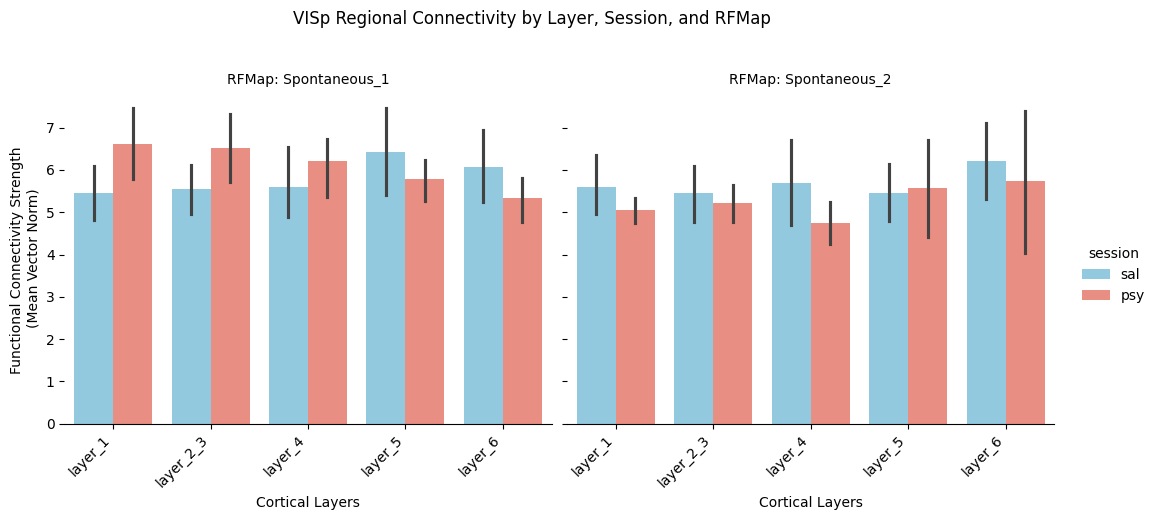

In [12]:
g = sns.catplot(
    data=final_df_visp,
    x='layers',
    y='mean',
    hue='session',
    col='RFmaps',
    kind='bar',
    palette={'sal': 'skyblue', 'psy': 'salmon'},
    ci=68,
    legend_out=True
)

# 3. Customize the plot for better readability
g.fig.suptitle('VISp Regional Connectivity by Layer, Session, and RFMap', y=1.03)
g.set_axis_labels("Cortical Layers", "Functional Connectivity Strength \n(Mean Vector Norm)")
g.set_titles("RFMap: {col_name}")
g.despine(left=True)

# Rotate x-axis labels to prevent overlap
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Move the legend to the right of the plot
sns.move_legend(g, "center left", bbox_to_anchor=(1, 0.5))

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.savefig(f'{save_path}/visp_inter_connectivity_spon_mean.svg')